In [32]:
import random, doctest, itertools
import numpy as np
from more_itertools import take
from datetime import datetime, timedelta
from typing import NamedTuple, Optional, Dict, Iterable


def versions() -> Iterable[str]:
    """
    Monotonically increasing sequence of version strings.

    >>> take(2, versions())
    ['0.0.0', '1.0.0']

    >>> take(10, versions())
    ['0.0.0', '1.0.0', '1.1.0', '2.0.0', '2.1.0', '2.2.0', '3.0.0', '3.1.0', '3.2.0', '3.3.0']
    """
    return (
        f"{major}.{minor}.{bugfix}"
        for major in itertools.count()
        for minor in range((major % 7) + 1)
        for bugfix in [0]
    )


def datetimes(day_zero: datetime) -> Iterable[datetime]:
    return (day_zero + timedelta(n) for n in itertools.count())


def datestamps(day_zero: datetime = datetime(year=2020, month=1, day=12)) -> Iterable[str]:
    """
    >>> take(2, datestamps())
    ['2020-01-12', '2020-01-13']

    >>> take(3, datestamps(day_zero=datetime(2030, 12, 31)))
    ['2030-12-31', '2031-01-01', '2031-01-02']
    """

    def fmt(date: datetime):
        return date.strftime("%Y-%m-%d")

    return map(fmt, datetimes(day_zero))


def asympt_approaching_1(
        approach_speed: float = 5., jitter_factor: float = 0.03, shift: float = 0.6
) -> Iterable[float]:
    assert 1 <= approach_speed
    assert 0 < jitter_factor < 1

    def y(x):
        base_val = 1 - (1 / (5 * x + shift))
        jitter = random.random() * 2 - 1

        return base_val + jitter * jitter_factor

    def within_range(x):
        return 0 < x < 1

    return filter(within_range, map(y, itertools.count()))


class Point(NamedTuple):
    value: float
    date: datetime
    version: Optional[str]
    params: Dict[str, str]
    #  posted_ts: datetime


def datestamped_points(
        values: Iterable[float], dates: Iterable[datetime], *, params: Dict[str, str]
) -> Iterable[Point]:
    return (
        Point(value, date, version=None, params=params)
        for value, date, version in zip(values, dates, versions)
    )


def versioned_points(
        values: Iterable[float], date: Iterable[datetime], *, versions: Iterable[str], params: Dict[str, str]
) -> Iterable[Point]:
    return (
        Point(value, date, version, params)
        for value, date, version in zip(values, date, versions)
    )

# values in these dicts will differentiate plots
teams = ['echo', 'foxtrot', 'lima']
classifiers = ['random-forest', 'cnn-gamma', 'cnn-eta']

In [33]:
param_combs = list(itertools.product(
    [2, 1, 5], # 
    [0.1, 0.01, 0.05],# 
))
teams_classifiers = list(itertools.product(teams, classifiers))

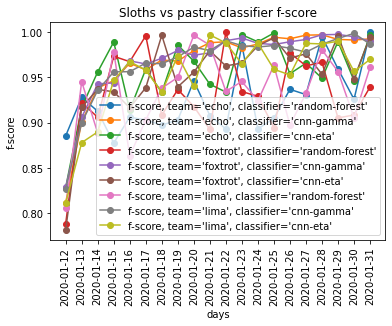

In [36]:
from matplotlib import pyplot as plt
for (asp, jitter), (team, classifier) in zip(param_combs, teams_classifiers):
    shift = 0.6
    
    points = take(20, versioned_points(
        asympt_approaching_1(asp, jitter, shift), 
        datestamps(),
        versions=versions(),
        params={'team': team, 'classifier': classifier}))
    
    xs = [p.date for p in points]
    ys = [p.value for p in points]
    
    
    plt.plot(xs, ys, label=f'f-score, {team=}, {classifier=}', marker="o")  # Plot some data on the (implicit) axes.
    plt.xlabel('days')
    plt.ylabel('f-score')
    plt.title("Sloths vs pastry classifier f-score")
    plt.legend()
    plt.xticks(xs, xs, rotation='vertical')
